In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dic = pickle.load(fo)
    return dic

In [3]:
file_name = '/Users/xinqu/Sandbox/CS498 Applied Machine Learning/HW/HW4/cifar-10-batches-py/data_batch_'
batch_name = ['1', '2', '3', '4', '5']
train_data = []
train_labels = []
for i in range(5):
    train_file = file_name + batch_name[i]
    train_dic = unpickle(train_file)
    train_data.append(train_dic['data'])
    train_labels.append(train_dic['labels'])

In [4]:
test_dic = unpickle('/Users/xinqu/Sandbox/CS498 Applied Machine Learning/HW/HW4/cifar-10-batches-py/test_batch')
test_data = np.array(test_dic['data']) ###(10000, 3072)
test_labels = np.array(test_dic['labels']) ###(10000,)

In [5]:
train_data = np.array(train_data).reshape(50000, 3072)
train_labels = np.array(train_labels).reshape(50000)

In [6]:
data = np.concatenate([train_data, test_data], axis = 0) ###(60000, 3072)
labels = np.concatenate([train_labels, test_labels], axis = 0) ###(60000,)

In [7]:
mean_image = np.array([np.mean(data[labels == i], axis = 0) for i in range(10)])
#mean_image.shape   ###(10, 3072)

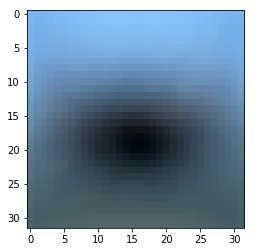

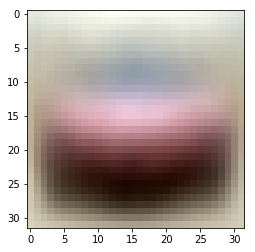

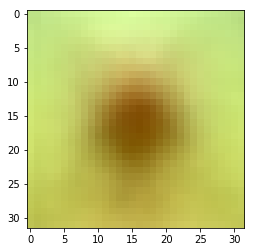

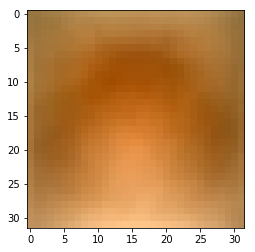

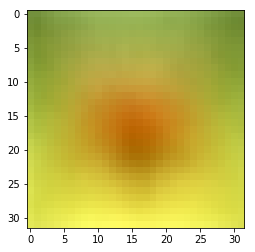

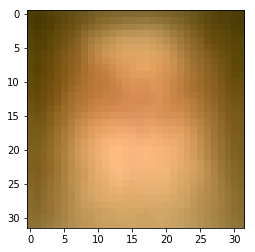

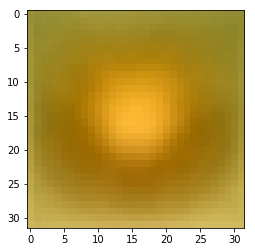

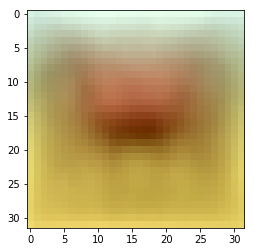

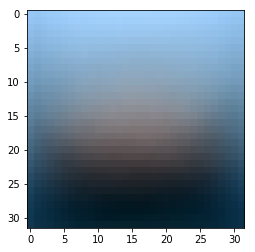

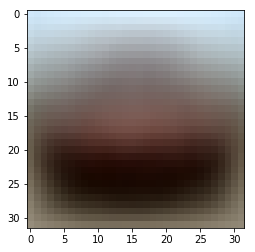

In [8]:
import warnings
warnings.filterwarnings('ignore')
for i in range(10):
    tmp = mean_image[i]
    im_r = tmp[:1024].reshape(32, 32) / 255.0
    im_g = tmp[1024:2048].reshape(32, 32) / 255.0
    im_b = tmp[2048:].reshape(32, 32) / 255.0
    img = np.dstack((im_r, im_g, im_b))
    from scipy.misc import toimage
    #plt.imshow(img0, interpolation='bicubic')
    plt.imshow(toimage(img))
    plt.show()

In [9]:
meta_data = unpickle('/Users/xinqu/Sandbox/CS498 Applied Machine Learning/HW/HW4/cifar-10-batches-py/batches.meta')
labels_name = np.array([str(label) for label in meta_data['label_names']])
labels_name

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='|S10')

In [10]:
from sklearn.decomposition import PCA
mses = np.zeros((10,))
pca = PCA()
for i in range(10):
    x = data[labels == i]
    pca.fit(x)  ###fit model
    x_hat = np.dot(pca.transform(x)[:, :20], pca.components_[:20, :]) ##reconstruct image to lower dims
    x_hat += mean_image[i] ##add mean tp reconstructed image
    mses[i] = np.sum(np.square(np.subtract(x, x_hat))) / x.shape[0]

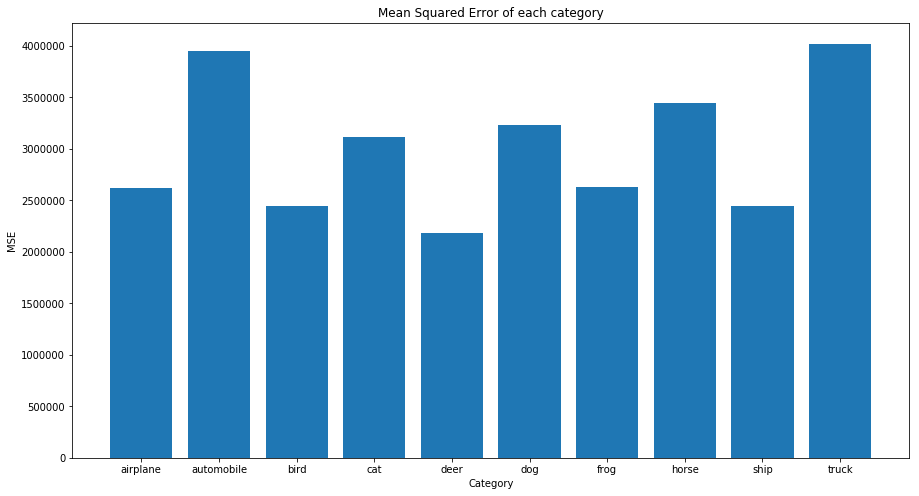

In [11]:
plt.figure(1, [15, 8])
plt.bar(range(10), mses)
plt.title('Mean Squared Error of each category')
plt.xlabel('Category')
plt.ylabel('MSE')
plt.xticks(np.arange(10), labels_name)
plt.show()

In [12]:
###implement PCA
def PCA_(data, n_features = 20):
    ###retutn mse
    data_mean = np.mean(data, axis = 0)
    data_ = data - data_mean  ###scale data
    cov_mat = np.cov(data_.T)
    e_vals, e_vecs = np.linalg.eig(cov_mat)
    e_pairs = [(e_vals[i], e_vecs[:, i]) for i in range(len(e_vals))]
    e_pairs.sort(key = lambda x: abs(x[0]), reverse = True)
    matrix_w = np.hstack((e_pairs[i][1].reshape(data.shape[1], 1) for i in range(n_features)))
    transformed = np.dot(data_, matrix_w)
    x_hat = np.dot(transformed, matrix_w.T)
    x_hat += data_mean
    mse = np.sum(np.square(np.subtract(data, x_hat))) / data.shape[0]
    return mse

In [13]:
mses_pca = []
for i in range(10):
    x = data[labels == i]
    mses_pca.append(PCA_(x))
mses_pca  ### same as mses from PCA

[2620500.856609749,
 3950675.838394288,
 2447697.747592209,
 3116478.889278504,
 2180391.158451238,
 3231113.3768560467,
 2630244.065887254,
 3441091.28992048,
 2440634.943571512,
 4021093.957865146]

In [14]:
mses

array([2620500.85660975, 3950675.83839429, 2447697.74759221,
       3116478.8892785 , 2180391.15845124, 3231113.37685604,
       2630244.06588725, 3441091.28992048, 2440634.94357151,
       4021093.95786515])

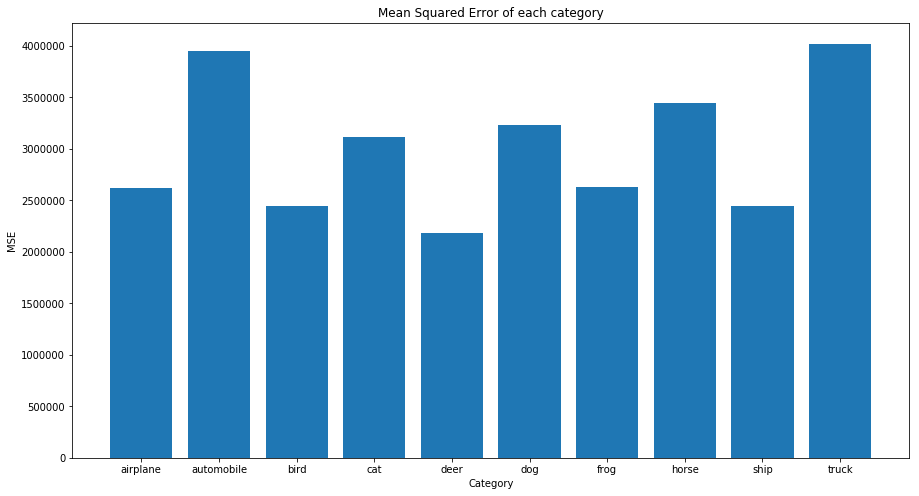

In [15]:
plt.figure(2, [15, 8])
plt.bar(range(10), mses_pca)
plt.title('Mean Squared Error of each category')
plt.xlabel('Category')
plt.ylabel('MSE')
plt.xticks(np.arange(10), labels_name)
plt.show()

In [16]:
distances_b = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        distances_b[i][j] = np.linalg.norm(mean_image[i] - mean_image[j])
distances_b = np.square(distances_b)
pd.DataFrame(distances_b).to_csv('partb_distances.csv', header = None, index = False)

In [17]:
distances_b

array([[      0.        , 2834628.00557175, 2576103.16377928,
        3631064.63976567, 4617184.2111755 , 3862095.51131942,
        5981349.32106314, 2767717.78900708,  894047.97913572,
        2099876.07233631],
       [2834628.00557175,       0.        ,  785415.57684336,
        1056064.07498914, 1306635.01215758, 1478849.174592  ,
        1418938.37801856,  903994.165812  , 1699025.04049136,
         902491.96502061],
       [2576103.16377928,  785415.57684336,       0.        ,
         267611.18973517,  361501.96560228,  492057.67140731,
         834934.52246658,  174955.06823514, 2426476.07315006,
        2006967.29994347],
       [3631064.63976567, 1056064.07498914,  267611.18973517,
              0.        ,  220704.25633956,  169893.72798797,
         458995.36855975,  355665.21264836, 3426995.12856744,
        2810544.47059514],
       [4617184.2111755 , 1306635.01215758,  361501.96560228,
         220704.25633956,       0.        ,  381549.75816469,
         212070.31614964

In [35]:
###get set of points to plot
def get_y(matrix):
    ###return y:set of points tp plot
    I = np.identity(10)
    A = I - 0.1 * np.ones((10, 10))
    W = -0.5 * np.dot(np.dot(A, matrix), A.T) 
    W_eval, W_evec = np.linalg.eig(W)
    #W_eval_abs = np.absolute(W_eval)
    #idx = W_eval_abs.argsort()
    idx = W_eval.argsort()
    e1_idx = idx[-1]
    e2_idx = idx[-2]
    e1 = W_eval[e1_idx]
    e2 = W_eval[e2_idx]
    vec1 = W_evec[:, e1_idx]
    vec2 = W_evec[:, e2_idx]
    U_s = np.concatenate((vec1, vec2)).reshape(2, 10)
    sigma_s = np.array([[np.sqrt(e1), 0], [0, np.sqrt(e2)]]) 
    y = np.dot(sigma_s, U_s)
    return y.T

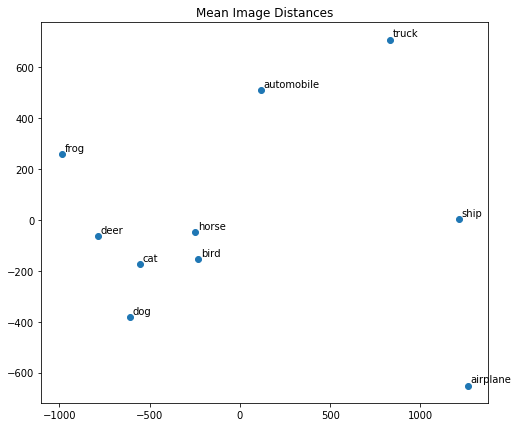

In [36]:
###partB plot 2D map of mean image distances
y = get_y(distances_b)
plt.figure(2, [8, 7])
plt.scatter(y[:, 0], y[:, 1])
plt.title('Mean Image Distances')
for i in range(10):
    plt.annotate(labels_name[i], (y[:, 0][i], y[:, 1][i]), xytext = (3, 3), textcoords = 'offset points')
plt.show()

In [20]:
pca = PCA(n_components = 20)
pca_list = []
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = True, with_mean = True, with_std = False)
scaled_data = []
for i in range(10):
    scaled_data.append(scaler.fit_transform(data[labels == i]))

In [21]:
for i in scaled_data:
    model = pca.fit(i)
    components = model.components_
    pca_list.append(components)

In [22]:
E = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        transformed = np.dot(pca_list[j], scaled_data[i].T) ##transformed by class B
        x_hat = np.dot(transformed.T, pca_list[j]) ##lower dim of class A by 20pca from class B
        x_hat += mean_image[i]
        error = np.sum(np.square(np.subtract(x_hat, data[labels == i])), axis = 1).mean()
        E[i][j] = error
E

array([[2620523.99695639, 2998379.17213963, 2896617.29801698,
        3037299.37424785, 2781994.74337568, 3053720.53057349,
        2988957.91063672, 2924423.25009762, 2794233.91664949,
        3049016.19965927],
       [4448616.33801899, 3950743.73053345, 4490417.79116957,
        4481669.7092506 , 4393530.47801758, 4604524.16734238,
        4447145.14124654, 4528917.00661995, 4304162.65680782,
        4094396.06681409],
       [2692113.7042113 , 2908705.45144713, 2447714.20704023,
        2614304.69757291, 2559421.24221324, 2557137.02578578,
        2603663.47870016, 2664906.28317606, 2821428.45036364,
        2837606.71149006],
       [3577313.6575766 , 3596126.11789027, 3264171.61944009,
        3116509.58647499, 3358952.95687287, 3209608.14085255,
        3263547.15241478, 3377759.72677185, 3565660.22155876,
        3437848.19873189],
       [2328187.56317369, 2507210.97778594, 2287889.65026516,
        2420255.97166916, 2180396.44919212, 2384940.35080361,
        2329858.06889156

In [23]:
distances_partc = np.zeros((10, 10))
for i in range(10):
    for j in range(10):
        distances_partc[i][j] = (E[i][j] + E[j][i]) / 2.0
distances_partc

array([[2620523.99695639, 3723497.75507931, 2794365.50111414,
        3307306.51591223, 2555091.15327468, 3399546.61228246,
        2950247.09616752, 3394608.24901981, 2716070.24498121,
        3794119.31642631],
       [3723497.75507931, 3950743.73053345, 3699561.62130835,
        4038897.91357044, 3450370.72790176, 4210890.2049395 ,
        3685127.38084299, 4229598.85750353, 3488865.39033518,
        4134638.2667362 ],
       [2794365.50111414, 3699561.62130835, 2447714.20704023,
        2939238.1585065 , 2423655.4462392 , 2967072.07347733,
        2685760.39155546, 3199838.6887753 , 2813408.95389806,
        3634432.0416124 ],
       [3307306.51591223, 4038897.91357044, 2939238.1585065 ,
        3116509.58647499, 2889604.46427101, 3262721.94170439,
        3028784.10936782, 3546530.06407384, 3202746.08251699,
        3897659.81698638],
       [2555091.15327468, 3450370.72790176, 2423655.4462392 ,
        2889604.46427101, 2180396.44919212, 2954897.5195977 ,
        2553838.26436109

In [24]:
pd.DataFrame(distances_partc).to_csv('partc_distances.csv', header = None, index = False)

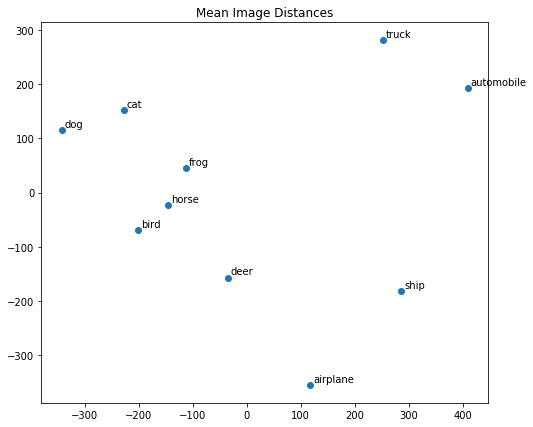

In [37]:
###partC plot 2D map of mean image distances
y = get_y(distances_partc)
plt.figure(2, [8, 7])
plt.scatter(y[:, 0], y[:, 1])
plt.title('Mean Image Distances')
for i in range(10):
    plt.annotate(labels_name[i], (y[:, 0][i], y[:, 1][i]), xytext = (3, 3), textcoords = 'offset points')
plt.show()